In [1]:
import cv2
import numpy as np
import rawpy
import shutil
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from data import common

In [2]:
def imshows(ims, figsize=None, titles=[]):
    figsize = figsize or (len(ims) * 6, 4)
    plt.figure(figsize=figsize)
    for i, im in enumerate(ims):
        plt.subplot(1, len(ims), i + 1)
        plt.imshow(im)
        if len(titles) > i:
            plt.title(titles[i])
    plt.tight_layout()
    plt.show()

Let's prepare rgb files

In [9]:
base = Path('dataset/RAW/train')

In [10]:
save_path = base / "rgb_HR"
save_path.mkdir(exist_ok=True)


for p in base.glob("*[0-9]"):
    try:
        img = cv2.imread(str(p / '00001.jpg'))
        h, w, c = img.shape
        ix, iy = int(h/12) * 6, int(w/12) * 6
        cx, cy = int(h/2), int(w/2)
        img = img[cx - ix:cx + ix, cy - iy:cy + iy, :]
        cv2.imwrite(str(save_path / "{}.JPG".format(p.name)), img)
        
    except Exception as e:
        print(base.name, p.name, e)
    finally:
        pass

In [11]:
source_path = base / "rgb_HR"
save_path = base / "rgb_LR_bicubic"
save_path.mkdir(exist_ok=True)

for p in source_path.glob("*.JPG"):
    try:
        img = cv2.imread(str(p))
        h, w, c = img.shape
        for scale in [2, 3, 4]:
            ch, cw = int(h/scale), int(w/scale)
            assert ch*scale == h and ch*scale == h, "Scale error!"
            img = cv2.resize(img, dsize=(cw, ch), interpolation=cv2.INTER_CUBIC)
            target_path = save_path / "X{:1d}".format(scale)
            target_path.mkdir(exist_ok=True)
            name = target_path / "{}X{:1d}{}".format(p.stem, scale, p.suffix)
            cv2.imwrite(str(name), img)
    except Exception as e:
        print(p.name, e)
    finally:
        pass

From here, deal with raw image

In [12]:
save_path = base / "raw_HR"
save_path.mkdir(exist_ok=True)


for p in base.glob("*[0-9]"):
    try:
        img = str(p / '00001.ARW')
        target = str(save_path / "{}.JPG".format(p.name))
        shutil.move(img, target)
        
    except Exception as e:
        print(base.name, p.name, e)
    finally:
        pass

In [8]:
list(base.glob("*[0-9]"))

[]

In [23]:
test = list(base.glob("*[0-9]"))
path = test[15] / "00001.ARW"

In [24]:
bayer = rawpy.imread(str(path))

In [37]:
bayer.raw_value_visible()

TypeError: raw_value_visible() takes exactly 2 positional arguments (0 given)

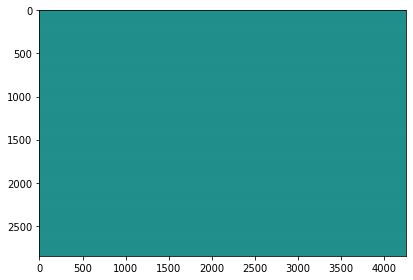

In [35]:
imshows([bayer.raw_colors_visible])

In [11]:
from data.common import get_4ch, get_1ch, get_bayer

In [19]:
bayer = get_bayer(bayer)
img = get_4ch(bayer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


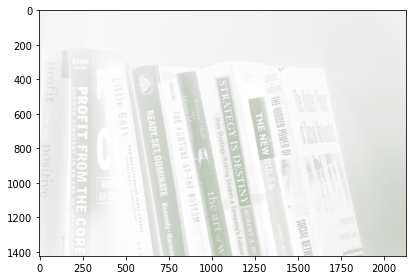

In [20]:
imshows([img])

In [22]:
img.max()

0.39468214

In [21]:
img.min()

-0.000504064

In [26]:
for p in base.glob("*[0-9]"):
    img = p / "00001.ARW"
    bayer = rawpy.imread(str(img))
    img = get_4ch(bayer.raw_image)
    print(img.shape)

(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
(1424, 2144, 4)
